In [2]:
# Import
import pandas as pd
import numpy as np
import hvplot.pandas
from pathlib import Path
from finta import TA
%matplotlib inline

In [3]:
df = pd.read_csv(Path("./Data/21-22Bitfinex_BTC.csv"), index_col= "Datetime", parse_dates= True, infer_datetime_format = True)
df.head()

,Symbol_Pair,Open,High,Low,Close,Volume_USD,Volume_in_Coin
Datetime,,,,,,,
2022-12-27,BTC/USD,16947.0,16987.0,16617.0,16720.0,1.567892e+07,937.734226
2022-12-26,BTC/USD,16848.0,16963.0,16814.0,16946.0,5.475269e+06,323.100970
2022-12-25,BTC/USD,16864.0,16874.0,16723.0,16847.0,6.358401e+06,377.420382
2022-12-24,BTC/USD,16802.0,16891.0,16802.0,16864.0,6.742337e+06,399.806526
2022-12-23,BTC/USD,16838.0,16966.0,16770.0,16802.0,8.902850e+06,529.868441


In [4]:
df = df.sort_index(ascending=True)

In [5]:
df["Return"] = df["Close"].pct_change()

In [6]:
df["%changeVolUSD"] = df["Volume_USD"].pct_change()

In [7]:
df["%changeVolCoin"] = df["Volume_in_Coin"].pct_change()
#df.head()

Remove: VWAP in Coin, EMA Signal
Add: Bollinger Bands

In [8]:
# Calculate Volume Weighted Average
# df['Cum_Vol'] = df['Volume'].cumsum()
# df['Cum_Vol_Price'] = (df['Volume'] * (df['High'] + df['Low'] + df['Close'] ) /3).cumsum()
# df['VWAP'] = df['Cum_Vol_Price'] / df['Cum_Vol']
df['VWAP_USD'] = ((df['Volume_USD'] * (df['High'] + df['Low'] + df['Close'] ) /3).cumsum()) / (df['Volume_USD'].cumsum())

In [9]:
# Set short and long windows for moving average calculations
short_window = 15
long_window = 150

# Generate the short and long moving averages
df["Short_EMA"] = TA.EMA(df, short_window)
df["Long_EMA"] = TA.EMA(df, long_window)

In [10]:
# Determine the Bollinger Bands for the Dataset
bbands_df = TA.BBANDS(df)
df = pd.concat([df, bbands_df], axis=1)
df

,Symbol_Pair,Open,High,Low,Close,Volume_USD,Volume_in_Coin,Return,%changeVolUSD,%changeVolCoin,VWAP_USD,Short_EMA,Long_EMA,BB_UPPER,BB_MIDDLE,BB_LOWER
Datetime,,,,,,,,,,,,,,,,
2021-01-02,BTC/USD,29349.832502,33292.000000,29000.0,32183.0,7.084419e+08,22012.924315,NaN,NaN,NaN,31491.666667,32183.000000,32183.000000,NaN,NaN,NaN
2021-01-03,BTC/USD,32185.000000,34873.000000,31975.0,32968.0,6.233887e+08,18908.902489,0.024392,-0.120057,-0.141009,32324.985591,32601.666667,32578.116667,NaN,NaN,NaN
2021-01-04,BTC/USD,32990.000000,33593.616276,28540.0,31990.0,7.897427e+08,24687.173521,-0.029665,0.266854,0.305585,31971.187577,32370.029586,32379.458156,NaN,NaN,NaN
2021-01-05,BTC/USD,31991.000000,34493.000000,29861.0,33985.0,4.922056e+08,14483.024502,0.062363,-0.376752,-0.413338,32123.433784,32857.855457,32788.906766,NaN,NaN,NaN
2021-01-06,BTC/USD,33978.000000,36932.000000,33335.0,36760.0,6.844488e+08,18619.391561,0.081654,0.390575,0.285601,32860.593811,33859.245348,33604.444818,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,BTC/USD,16838.000000,16966.000000,16770.0,16802.0,8.902850e+06,529.868441,-0.002138,-0.311693,-0.310219,43004.215535,16930.103884,20126.783554,17728.953856,17045.70,16362.446144
2022-12-24,BTC/USD,16802.000000,16891.000000,16802.0,16864.0,6.742337e+06,399.806526,0.003690,-0.242676,-0.245461,43003.329624,16921.840898,20083.565028,17719.329969,17032.55,16345.770031
2022-12-25,BTC/USD,16864.000000,16874.000000,16723.0,16847.0,6.358401e+06,377.420382,-0.001008,-0.056944,-0.055992,43002.493013,16912.485786,20040.693828,17717.558106,17026.15,16334.741894


In [11]:
#drop all null values in dataframe
df = df.dropna()

In [14]:
# Assign a copy of all columns except Close to a features DataFrame called X
X = df.drop(['Close','Symbol_Pair'], axis=1).copy()
# Create the target set selecting the Close column and assiging it to y
y = df['Return'].copy()

In [15]:
# display(X)
# y

In [16]:
from pandas.tseries.offsets import DateOffset
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report

In [17]:
import pydotplus
from IPython.display import Image

In [18]:
# Generate the X_train and y_train DataFrames
training_begin = X.index.min()
training_end = X.index.min() + DateOffset(months=3)

X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

    # Generate the X_test and y_test DataFrames
X_test = X.loc[training_end:]
y_test = y.loc[training_end:]

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [19]:
# Initiate the model instance
RFR = RandomForestRegressor(max_depth=3,random_state=1)
        
# Fit the model using the training data
model = RFR.fit(X_train_scaled,y_train)
# Use the testing dataset to generate the predictions for the new model
pred = RFR.predict(X_test_scaled)

predictions_df = pd.DataFrame(index=X_test.index)
predictions_df['Predicted Returns'] = pred
predictions_df['Actual Returns'] = df['Return']
predictions_df['Difference'] = predictions_df['Predicted Returns'] - predictions_df['Actual Returns']
display(predictions_df)
print("The sum of the differences is:", predictions_df.Difference.sum())

,Predicted Returns,Actual Returns,Difference
Datetime,,,
2021-04-21,-0.048262,-0.047655,-0.000607
2021-04-22,-0.036435,-0.038023,0.001587
2021-04-23,-0.012713,-0.011542,-0.001170
2021-04-24,-0.019991,-0.019105,-0.000885
2021-04-25,-0.020249,-0.020574,0.000325
...,...,...,...
2022-12-23,0.000660,-0.002138,0.002798
2022-12-24,0.001999,0.003690,-0.001691
2022-12-25,0.000660,-0.001008,0.001668


The sum of the differences is: 0.19482982794824677


In [20]:
predictions_df.hvplot(title="Random Forest Regression Model Predicted vs Actual Returns")

:NdOverlay   [Variable]
   :Curve   [Datetime]   (value)

In [21]:
#Example on R_Square and Adjusted R Square
import statsmodels.api as sm
X_addC = sm.add_constant(X)
result = sm.OLS(y, X_addC).fit()
print(result.rsquared, result.rsquared_adj)

1.0 1.0


In [22]:
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(y_test, pred))
print(math.sqrt(mean_squared_error(y_test, pred)))

5.2528572975203697e-05
0.007247659827503199


In [23]:
importances = RFR.feature_importances_
important_features = zip(X.columns, importances)

In [24]:
importances_df = pd.DataFrame(important_features)
importances_df = importances_df.rename(columns={0: 'Feature', 1: "Importance"})
importances_df = importances_df.set_index("Feature")
importances_df = importances_df.sort_values(by='Importance', ascending=True)

<AxesSubplot:title={'center':'Feature Importance'}, xlabel='Feature'>

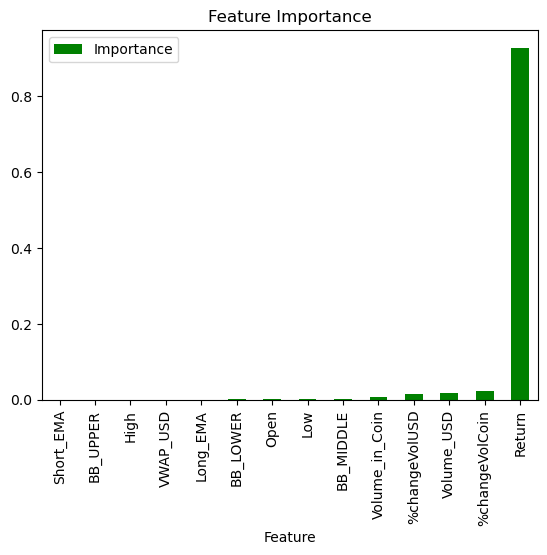

In [25]:
importances_df[0:].plot(kind='bar', color='green', title='Feature Importance', legend=True)

In [26]:
importances_df

,Importance
Feature,
Short_EMA,0.000000
BB_UPPER,0.000000
High,0.000050
VWAP_USD,0.000089
Long_EMA,0.000112
BB_LOWER,0.001176
Open,0.001329
Low,0.001745
BB_MIDDLE,0.001910
